In [1]:
import pandas as pd

df = pd.read_excel (r'C:\Users\hanja\Desktop\ROI Curves - Renewals Table.xlsx') 

In [121]:
Renewals_df = df[['Step','Drawer','paf_taskdimid','paf_elapsedtime_hrs']]
Renewals_df.dropna(axis=0,how='any')
Renewals_df.sort_values(by = ['Drawer','Step'])
Renewals_df.drop(df.index[[1671,1670]])

,Step,Drawer,paf_taskdimid,paf_elapsedtime_hrs
0,Ren - Begin Renewal,013 - Tampa,1.0,429.085556
1,Ren - Begin Renewal,040 - Sarasota,3.0,59.065833
2,Ren - Pend for Response,040 - Sarasota,19.0,14144.586944
3,Ren - Begin Renewal,044 - Central Coast,1.0,215.242500
4,Ren - Begin Renewal,044 - Central Coast,1.0,407.278889
...,...,...,...,...
1665,Ren - Auto Renew,566 - Homestead,1.0,0.039167
1666,Ren - Support,566 - Homestead,1.0,0.641389
1667,Ren - Begin Renewal,575 - Nashville,3.0,2149.575833
1668,Ren - Begin Renewal,583 - Oakland,3.0,929.201667


In [122]:
Renewals_df = Renewals_df.groupby(['Drawer','Step'],as_index=False).sum()
Renewals_df['Drawer'] = Renewals_df['Drawer'].str.split("-").str[1]

In [123]:
Renewals_df['Average_Elapsed_Time_Hrs'] = Renewals_df.paf_elapsedtime_hrs/Renewals_df.paf_taskdimid

In [124]:
print(Renewals_df)


             Drawer                              Step  paf_taskdimid  \
0             Tampa                  Ren - Auto Renew            1.0   
1             Tampa               Ren - Begin Renewal           11.0   
2             Tampa  Ren - Gather Renewal Information            3.0   
3             Tampa            Ren - Prepare Proposal           26.0   
4             Tampa                     Ren - Support           21.0   
..              ...                               ...            ...   
173          Dedham            Ren - Prepare Proposal            1.0   
174   Hudson Valley               Ren - Begin Renewal           47.0   
175   Hudson Valley  Ren - Gather Renewal Information          126.0   
176   Hudson Valley            Ren - Prepare Proposal            6.0   
177   Hudson Valley                     Ren - Support           52.0   

     paf_elapsedtime_hrs  Average_Elapsed_Time_Hrs  
0               0.061389                  0.061389  
1           14911.508056     

In [125]:
Auto_Renews = Renewals_df[Renewals_df.Step == 'Ren - Auto Renew']
Auto_Renews = Auto_Renews.sort_values('Average_Elapsed_Time_Hrs')

Text(0.5, 0.98, 'Auto Renew Step')

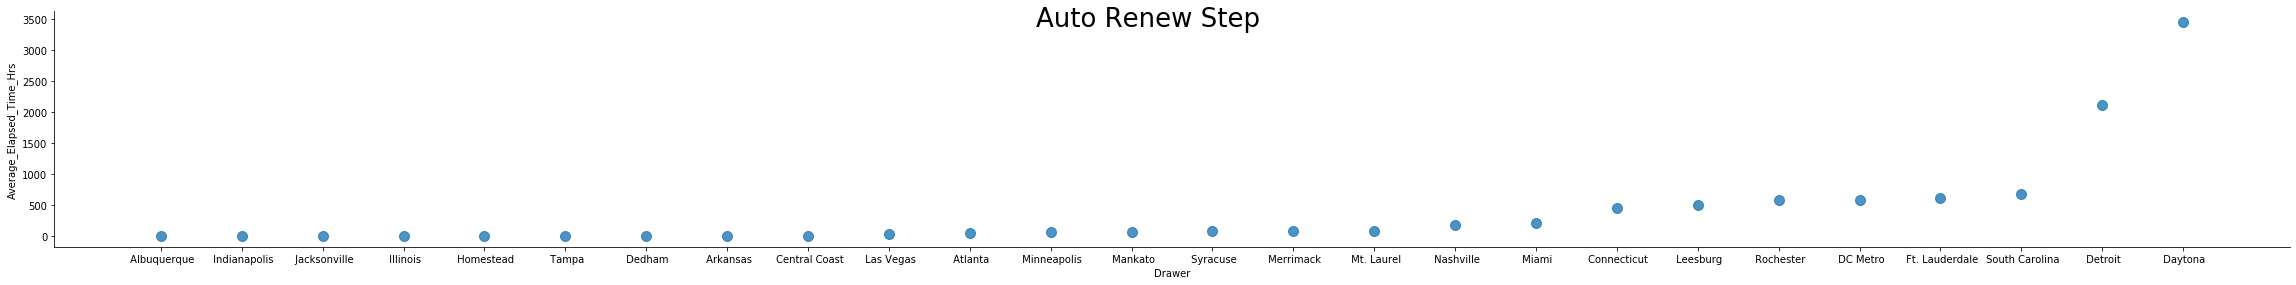

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

lm = sns.lmplot("Drawer", "Average_Elapsed_Time_Hrs", data=Auto_Renews, fit_reg=False,size=4, aspect = 8,scatter_kws={"s": 100})
fig = lm.fig
fig.suptitle("Auto Renew Step", fontsize = 26)

In [132]:
Gather_Renewal_Information  = Renewals_df[Renewals_df.Step == 'Ren - Gather Renewal Information ']
Gather_Renewal_Information = Gather_Renewal_Information.sort_values('Average_Elapsed_Time_Hrs')

Text(0.5, 0.98, 'Gather Renewal Information Step')

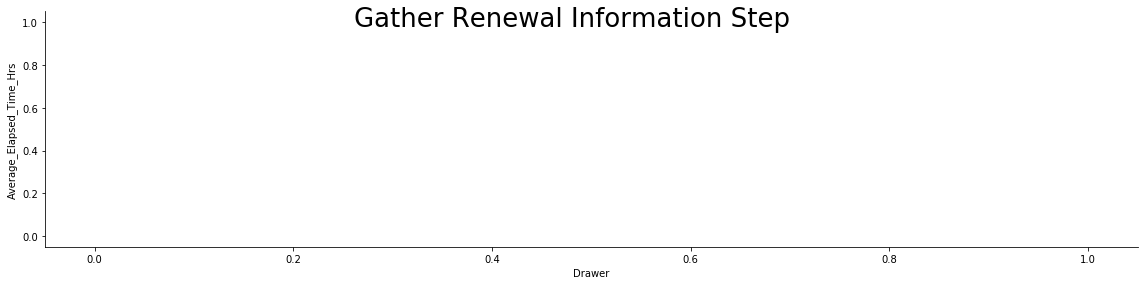

In [133]:
lm = sns.lmplot("Drawer", "Average_Elapsed_Time_Hrs", data=Gather_Renewal_Information, fit_reg=False,size=4, aspect = 4)
fig = lm.fig
fig.suptitle("Gather Renewal Information Step", fontsize = 26)

In [134]:
Begin_Renewals = Renewals_df[Renewals_df.Step == 'Ren - Begin Renewal']
Begin_Renewals = Begin_Renewals.sort_values('Average_Elapsed_Time_Hrs')

Text(0.5, 0.98, 'Begin Renewals Step')

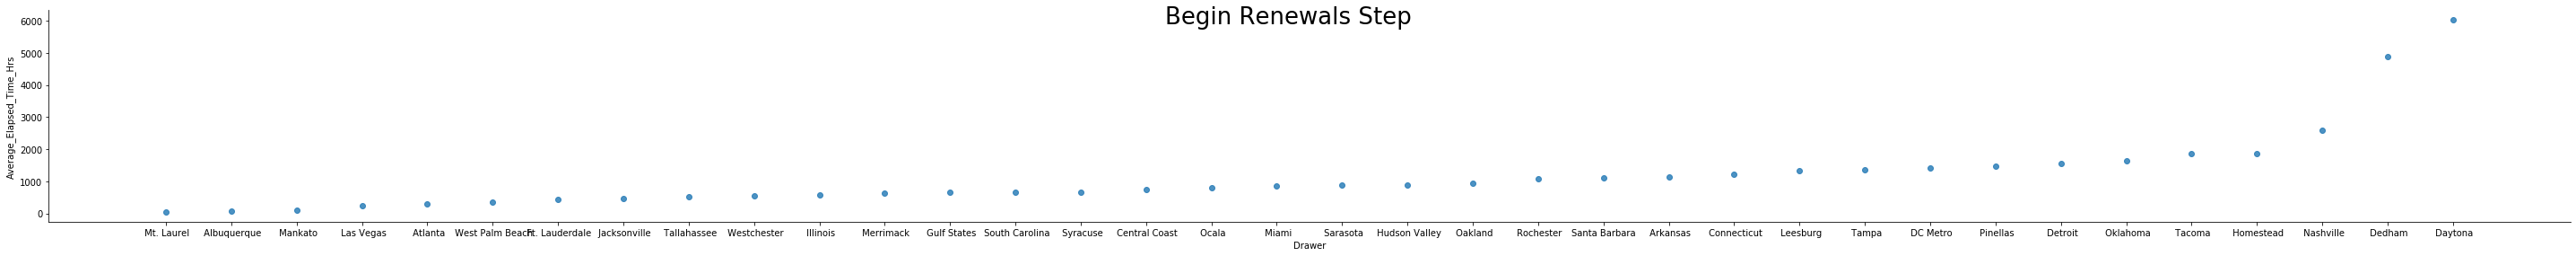

In [140]:
lm = sns.lmplot("Drawer", "Average_Elapsed_Time_Hrs", data=Begin_Renewals, fit_reg=False,size=4, aspect = 10)
fig = lm.fig
fig.suptitle("Begin Renewals Step", fontsize = 26)

In [143]:
Prepare_Proposal = Renewals_df[Renewals_df.Step == 'Ren - Prepare Proposal']
Prepare_Proposal = Prepare_Proposal.sort_values('Average_Elapsed_Time_Hrs')

Text(0.5, 0.98, 'Prepare Proposal Step')

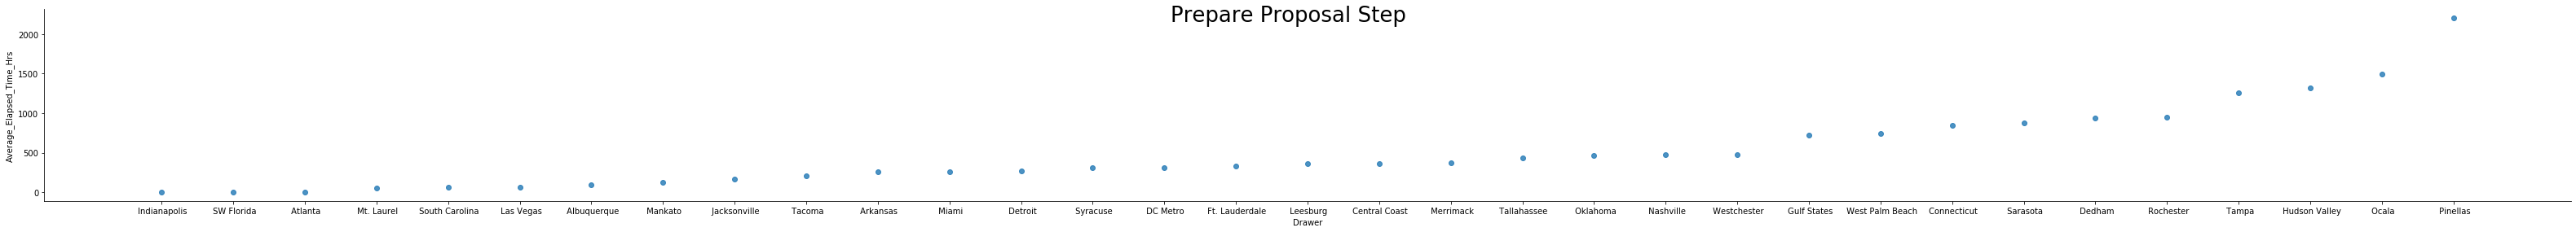

In [150]:
lm = sns.lmplot("Drawer", "Average_Elapsed_Time_Hrs", data=Prepare_Proposal, fit_reg=False,size=4, aspect = 11)
fig = lm.fig
fig.suptitle("Prepare Proposal Step", fontsize = 26)